# ZSU - project 1
## Tomas Bezdek - PIP0015
[Data source](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data)

## Data description

#### Dataset Information:

This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. Such system provides users with a synchronous access to educational resources from any device with Internet connection.

The data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. The experience API helps the learning activity providers to determine the learner, activity and objects that describe a learning experience. The dataset consists of 480 student records and 16 features. The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

The dataset consists of 305 males and 175 females. The students come from different origins such as 179 students are from Kuwait, 172 students are from Jordan, 28 students from Palestine, 22 students are from Iraq, 17 students from Lebanon, 12 students from Tunis, 11 students from Saudi Arabia, 9 students from Egypt, 7 students from Syria, 6 students from USA, Iran and Libya, 4 students from Morocco and one student from Venezuela.

The dataset is collected through two educational semesters: 245 student records are collected during the first semester and 235 student records are collected during the second semester.

The data set includes also the school attendance feature such as the students are classified into two categories based on their absence days: 191 students exceed 7 absence days and 289 students their absence days under 7.

This dataset includes also a new category of features; this feature is parent parturition in the educational process. Parent participation feature have two sub features: Parent Answering Survey and Parent School Satisfaction. There are 270 of the parents answered survey and 210 are not, 292 of the parents are satisfied from the school and 188 are not.

#### Attributes:

1) Gender - student's gender (nominal: 'Male' or 'Female’)

2) Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3) Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4) Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5) Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6) Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7) Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8) Semester- school year semester (nominal:’ First’,’ Second’)

9) Parent responsible for student (nominal:’mom’,’father’)

10) Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11) Visited resources- how many times the student visits a course content(numeric:0-100)

12) Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13) Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14) Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15) Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16) Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

- The students are classified into three numerical intervals based on their total grade/mark:

- Low-Level: interval includes values from 0 to 69,

- Middle-Level: interval includes values from 70 to 89,

- High-Level: interval includes values from 90-100.

## Hypotheses:
1) Parents that are satisfied with school usually answer the surveys, that are provided by school. Moms more often than dads.
2) Older students (Students in higher grades) have more absence than the younger ones. Boys are missing more than girls.
3) Students in Lover level school raised hands more often than those in Middle school and much more than those on High school, overall the lower is grade of the student, the more often he/she raised his/her hand.  Girls more often than boys.
4) Most of the students have same nationality as place of birth.
5) Total mark in second semester is usually worse than in first semester.
6) There is much more boys than girls from middle east (Kuwait, Lebanon, Egypt, SaudiArabia, Jordan, Iran, Tunis, Morocco, Syria, Palestine, Iraq, Lybia) and for most of them is responsible their father.
7) Sections are divided by to classification of students, A=High-Level, B=Middle-Level, C=Low-Level
8) Girls have better final mark in [English, Spanish, Arabic, History], boys in [IT, Math, Science, Chemistry, Biology, Geology, Quran].
9) The more students visit resources, the more they participate on discussion groups. Students from Lover level school participate in discussion less than the other ones.
10) In all countries, the education levels are same lower level=G-01 to G-05, Middle school=G-06 to G-08, High school=G-09 to G-12
11) Parents of students with better marks are more satisfied with school, mothers are more satisfied than fathers.

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv', sep=',')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [3]:
#Check for missing values
df.isna().sum().sort_values(ascending=False).head(20)

gender                      0
raisedhands                 0
StudentAbsenceDays          0
ParentschoolSatisfaction    0
ParentAnsweringSurvey       0
Discussion                  0
AnnouncementsView           0
VisITedResources            0
Relation                    0
NationalITy                 0
Semester                    0
Topic                       0
SectionID                   0
GradeID                     0
StageID                     0
PlaceofBirth                0
Class                       0
dtype: int64

As we could see, there aren't any missing values in dataset. Now we could focus on the hypotheses.

### Function for converting absolute count to relative percentage

In [4]:
def to_relative_percentage(data :pd.DataFrame, group_by_attribute : str, categorical_attribute : str, category_value:str, relative_column_name = '%' ):#->pd.DataFrame:
    count_all_df = data.groupby(group_by_attribute)[group_by_attribute].count().reset_index(name='count_all')
    count_of_category = data.groupby(group_by_attribute)[categorical_attribute].apply(lambda x:(x==category_value).sum()).reset_index(name = 'count_category')
    count_all_df.loc[:,relative_column_name] = (count_of_category.count_category/ count_all_df.count_all)*100
    output = count_all_df.drop(['count_all'], axis=1)
    return output

### 1. Parents that are satisfied with school usually answer the surveys, that are provided by school. Moms more often than dads.

<AxesSubplot:title={'center':'Fathers'}, xlabel='ParentschoolSatisfaction', ylabel='count'>

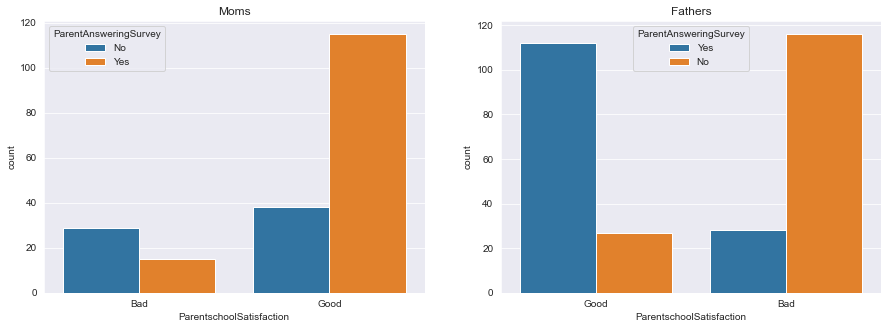

In [5]:
moms = df[df.Relation == 'Mum']
dads = df[df.Relation == 'Father']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.set_title('Moms')
sns.countplot(data = moms, hue= 'ParentAnsweringSurvey', x='ParentschoolSatisfaction',ax = ax1)
ax2.set_title('Fathers')
sns.countplot(data = dads, hue = 'ParentAnsweringSurvey', x='ParentschoolSatisfaction',ax= ax2)

<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='% of survey answering'>

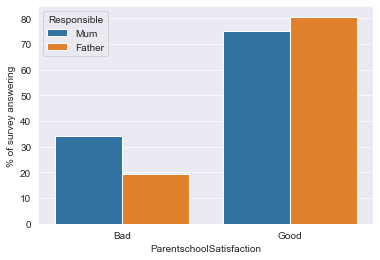

In [6]:
column_name = '% of survey answering'
tmp1 = to_relative_percentage(df[df.Relation == 'Mum'], 'ParentschoolSatisfaction','ParentAnsweringSurvey','Yes',column_name).sort_values(by = 'ParentschoolSatisfaction')
tmp1.loc[:,'Responsible'] = 'Mum'

ax1.set_title('Fathers - relative survey answering')
tmp2 = to_relative_percentage(df[df.Relation == 'Father'], 'ParentschoolSatisfaction','ParentAnsweringSurvey','Yes',column_name).sort_values(by = 'ParentschoolSatisfaction')
tmp2.loc[:,'Responsible'] = 'Father'

data = pd.concat([tmp1, tmp2], ignore_index=True)
sns.barplot(data=data, y = column_name, x='ParentschoolSatisfaction', hue='Responsible')

As we could see above, for both Moms and Fathers, the ones who are satisfied with the school usually answer the survey, on the other hand, the ones who are not satisfied with the school usually don't answer the survey. For Fathers, the difference between satisfied and dissatisfied is striking. For Moms, the graph look mostly the same for those who are satisfied with school as the graph of father who are satisfied with school. The difference between moms and fathers is observable when we look on the dissatisfied, for fathers, just small amount of them answer the survey but for moms, almost 1/3 of them answer the survey.

From what was writen above, we could say that the hypothesis is confirmed.

### 2. Older students (Students in higher grades) have more absence than the younger ones. Boys are missing more than girls.

<AxesSubplot:title={'center':'Girls - absolute absence'}, xlabel='GradeID', ylabel='Count'>

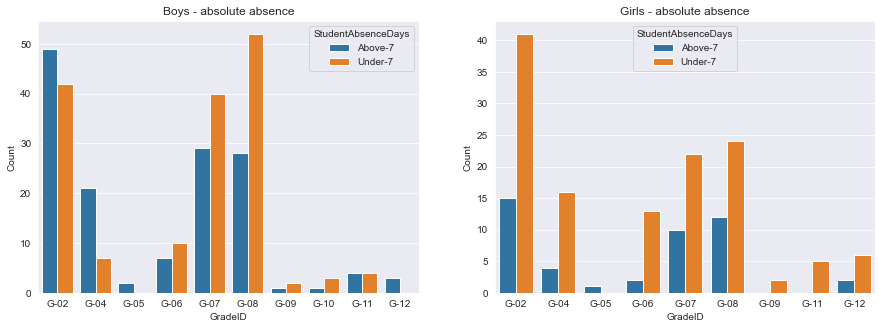

In [7]:
boys = df[df.gender == 'M']
girls = df[df.gender == 'F']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.set_title('Boys - absolute absence')
boys = boys.groupby(['StudentAbsenceDays', 'GradeID']).StudentAbsenceDays.count().reset_index(name='Count').sort_values(by = 'GradeID')
sns.barplot(data=boys, x = 'GradeID', y = 'Count', hue = 'StudentAbsenceDays', ax = ax1)
ax2.set_title('Girls - absolute absence')
girls = girls.groupby(['StudentAbsenceDays', 'GradeID']).StudentAbsenceDays.count().reset_index(name='Count').sort_values(by = 'GradeID')
sns.barplot(data=girls, x = 'GradeID', y = 'Count', hue = 'StudentAbsenceDays', ax = ax2)

<AxesSubplot:xlabel='GradeID', ylabel='% of above-7'>

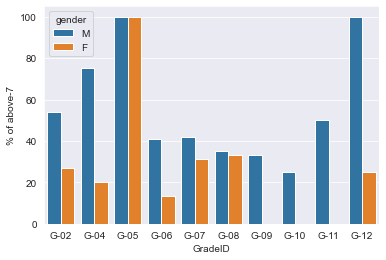

In [8]:
column_name = '% of above-7'

ax1.set_title('Boys - relative absence')
boys = to_relative_percentage(df[df.gender == 'M'], 'GradeID','StudentAbsenceDays','Above-7',column_name).sort_values(by = 'GradeID')
boys.loc[:,'gender'] = 'M'

ax2.set_title('Girls - relative absence')
girls = to_relative_percentage(df[df.gender == 'F'], 'GradeID','StudentAbsenceDays','Above-7',column_name).sort_values(by = 'GradeID')
girls.loc[:,'gender'] = 'F'

data = pd.concat([boys, girls], ignore_index=True)
sns.barplot(data=data, y = column_name, x = 'GradeID', hue='gender')

As we could see, it is true that girls have same or lover absence than boys. Also, we could see that students in lover grades (2,4,5) have higher absence than the students in the G6 to G-10. We also see that boys in the last documented grade (G-12) have one of the highest absence. To sum up, we could say that the hypothesis is disproved, also because there is almost no relation between grade and absence. The only relation is between girl's absence and boy's absence in each grade.

### 3. Students in Lover level school raised hands more often than those in Middle school and much more than those on High school, overall the lower is grade of the student, the more often he/she raised his/her hand.  Girls more often than boys.

<AxesSubplot:xlabel='GradeID', ylabel='raisedhands'>

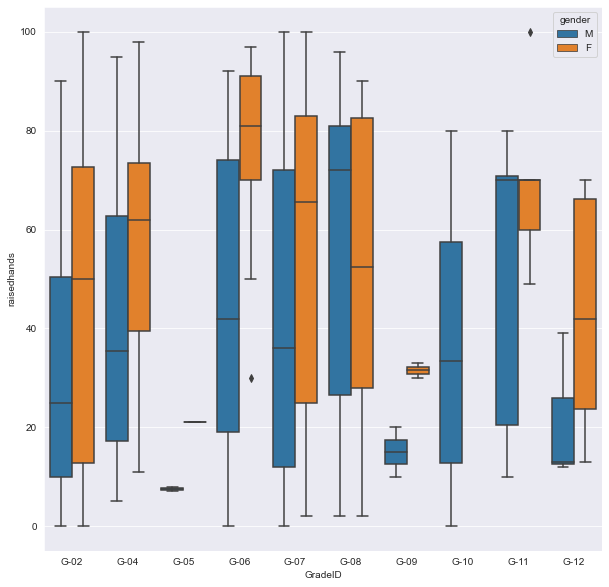

In [9]:
grades = ['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12']
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y = 'raisedhands', x ='GradeID', hue='gender', order=grades)

<AxesSubplot:xlabel='StageID', ylabel='raisedhands'>

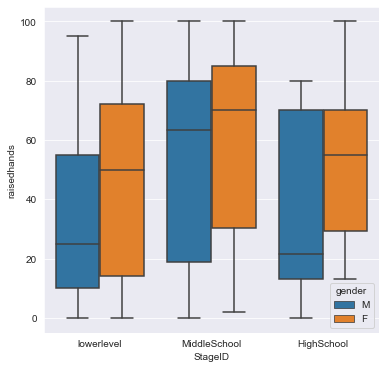

In [10]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,y = 'raisedhands', x = 'StageID', hue = 'gender')

As we could see above, over all levels off education (and over all grades), girls raised their hand more times than boys. From the both graphs, it's obvious that students in grades G6-G8/MiddleSchool raised hands the most of all students.

To sum up, we could say that the hypothesis is disproved.

### 4. Most of the students have same nationality as place of birth.

In [11]:
tmp = df
tmp.loc[:,'moved'] = df.PlaceofBirth == df.NationalITy
tmp = df.groupby(['PlaceofBirth', 'NationalITy']).NationalITy.count().reset_index(name='Count').sort_values(by = 'Count', ascending=False)
tmp

,PlaceofBirth,NationalITy,Count
10,KuwaIT,KW,177
4,Jordan,Jordan,152
3,Iraq,Iraq,22
5,Jordan,Palestine,22
27,lebanon,lebanon,16
20,Tunis,Tunis,9
16,SaudiArabia,Jordan,9
0,Egypt,Egypt,8
15,Palestine,Palestine,6
2,Iran,Iran,6


<AxesSubplot:xlabel='PlaceofBirth', ylabel='percent_moved'>

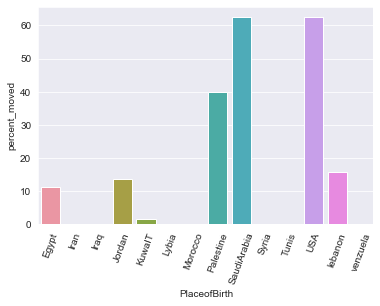

In [12]:
tmp = df
tmp['NationalITy'].mask(tmp['NationalITy'] == 'KW', 'KuwaIT', inplace=True)
tmp.loc[:,'moved'] = df.PlaceofBirth != df.NationalITy
moved_counts = tmp.groupby(['PlaceofBirth']).moved.sum().reset_index(name='moved_count')
birts_count = tmp.groupby(['PlaceofBirth']).PlaceofBirth.count().reset_index(name='births_count')
moved_counts.loc[:,'percent_moved'] = (moved_counts.moved_count/birts_count.births_count) * 100
plt.xticks(rotation=70)
sns.barplot(data=moved_counts, y = 'percent_moved', x='PlaceofBirth')

<AxesSubplot:xlabel='NationalITy', ylabel='percent_moved'>

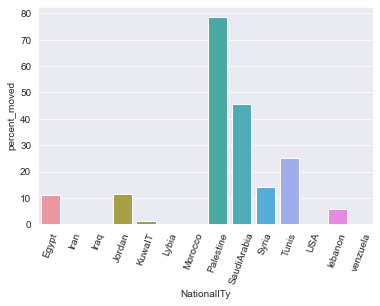

In [13]:
tmp = df
tmp['NationalITy'].mask(tmp['NationalITy'] == 'KW', 'KuwaIT', inplace=True)
tmp.loc[:,'moved'] = df.PlaceofBirth != df.NationalITy
moved_counts = tmp.groupby(['NationalITy']).moved.sum().reset_index(name='moved_count')
nationality_count = tmp.groupby(['NationalITy']).NationalITy.count().reset_index(name='nationality_count')
moved_counts.loc[:,'percent_moved'] = (moved_counts.moved_count/nationality_count.nationality_count) * 100
plt.xticks(rotation=70)
sns.barplot(data=moved_counts, y = 'percent_moved', x='NationalITy')

From the first graph, we could see that most of the students have same nationality as place of birth. The only exceptions are Palestine, Saudi Arabic and USA. We could discuss if in this case is nationality something else than citizenship, because everyone who is born in the USA automatically has american citizenship.

From the second graph, we could see almost the same, except the values of Tunis and USA. It's make sense, that someone who is not born in the USA, would hardly get USA citizenship. Also, just something about 25% of Tunisian students were born somewhere else than in Tunis.

To sum up, we could say that the hypothesis is confirmed.

### 5. Total mark in second semester is usually worse than in first semester.

([<matplotlib.patches.Wedge at 0x1e766f022e0>,
 [Text(0.18296226843403532, 1.0846772830337474, 'Medium'),
  Text(-1.0391359813614, -0.3608273995140617, 'Low'),
  Text(0.5286399633730495, -0.9646449031249484, 'High')])

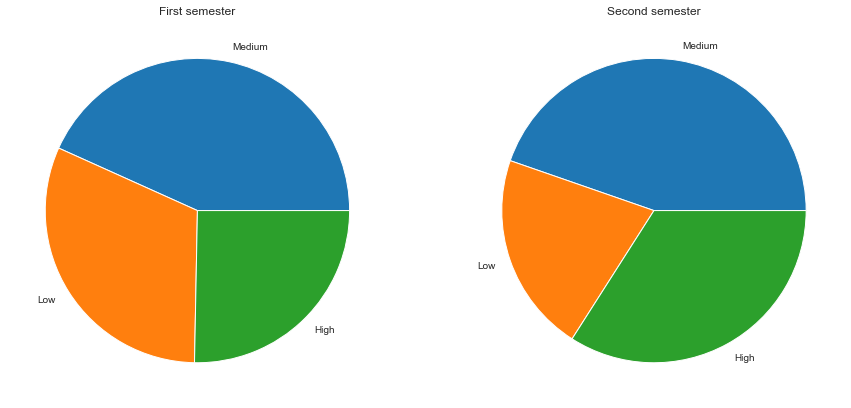

In [14]:
tmp1 = to_relative_percentage(df, 'Semester', 'Class', 'M')
tmp1.loc[:,'Class'] = 'Medium'
tmp2 = to_relative_percentage(df, 'Semester', 'Class', 'L')
tmp2.loc[:,'Class'] = 'Low'
tmp3 = to_relative_percentage(df, 'Semester', 'Class', 'H')
tmp3.loc[:,'Class'] = 'High'
tmp = pd.concat([tmp1, tmp2,tmp3], ignore_index=True)
tmp1 = tmp[tmp.Semester == 'F']
tmp2 = tmp[tmp.Semester == 'S']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.set_title('First semester')
ax1.pie(data=tmp1, x='%',labels ='Class')
ax2.set_title('Second semester')
ax2.pie(data=tmp2, x='%',labels ='Class')

([<matplotlib.patches.Wedge at 0x1e767006f10>,
 [Text(0.21459935421774118, 1.0788638084435536, 'Medium'),
  Text(-1.0966090675104638, 0.0863050001670319, 'Low'),
  Text(0.12929116788628794, -1.0923752990188857, 'High')])

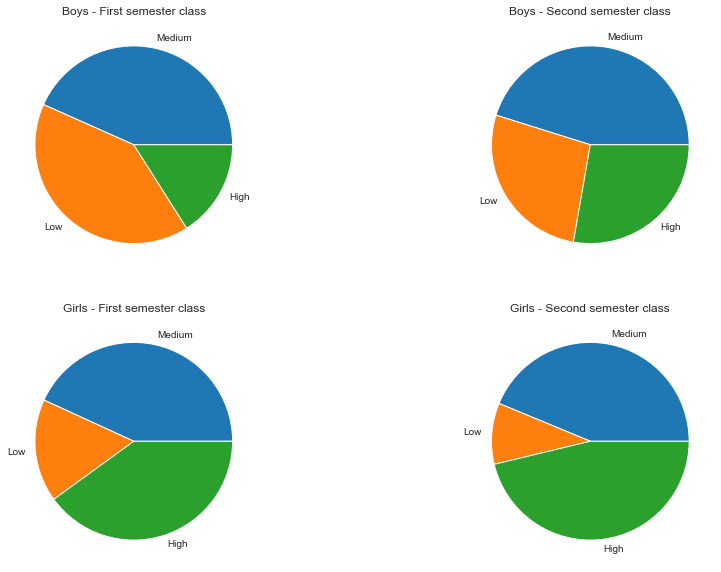

In [15]:
boys = df[df.gender == 'M']
tmp1 = to_relative_percentage(boys, 'Semester', 'Class', 'M')
tmp1.loc[:,'Class'] = 'Medium'
tmp2 = to_relative_percentage(boys, 'Semester', 'Class', 'L')
tmp2.loc[:,'Class'] = 'Low'
tmp3 = to_relative_percentage(boys, 'Semester', 'Class', 'H')
tmp3.loc[:,'Class'] = 'High'
boys = pd.concat([tmp1, tmp2,tmp3], ignore_index=True)
first_semester_boys = boys[boys.Semester == 'F']
second_semester_boys = boys[boys.Semester == 'S']

girls = df[df.gender == 'F']
tmp1 = to_relative_percentage(girls, 'Semester', 'Class', 'M')
tmp1.loc[:,'Class'] = 'Medium'
tmp2 = to_relative_percentage(girls, 'Semester', 'Class', 'L')
tmp2.loc[:,'Class'] = 'Low'
tmp3 = to_relative_percentage(girls, 'Semester', 'Class', 'H')
tmp3.loc[:,'Class'] = 'High'
girls = pd.concat([tmp1, tmp2,tmp3], ignore_index=True)
first_semester_girls = girls[girls.Semester == 'F']
second_semester_girls = girls[girls.Semester == 'S']

fig, ((ax1_1, ax1_2), (ax2_1, ax2_2)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax1_1.set_title('Boys - First semester class')
ax1_1.pie(x=first_semester_boys['%'],labels =first_semester_boys.Class)
ax1_2.set_title('Boys - Second semester class')
ax1_2.pie(x=second_semester_boys['%'],labels =second_semester_boys.Class)
ax2_1.set_title('Girls - First semester class')
ax2_1.pie(x=first_semester_girls['%'],labels =first_semester_boys.Class)
ax2_2.set_title('Girls - Second semester class')
ax2_2.pie(x=second_semester_girls['%'],labels =second_semester_boys.Class)

We could see that marks in second semester are not worse than in first semester, rather it look like it's a opposite way and marks in the second semester are better than in first semester.

We could also distinguish marks of boys and girls. Even if we divide the data on boys and girls, the trend is still same and marks in second semester are better than in the first one. Also, we could see that in both semesters, girls have overall better marks than boys.

To sum up, the hypothesis is disproved.

### 6. There is much more boys than girls from middle east (Kuwait, Lebanon, Egypt, SaudiArabia, Jordan, Iran, Tunis, Morocco, Syria, Palestine, Iraq, Lybia) and for most of them is responsible their father.

([<matplotlib.patches.Wedge at 0x1e76738dfa0>,
 [Text(-0.3134090690053002, 1.0544073005557346, 'Father'),
  Text(0.3134089702845625, -1.0544073298992047, 'Mum')])

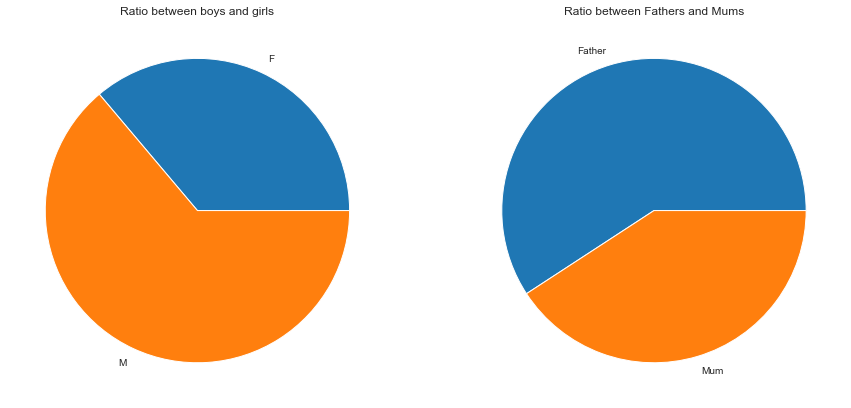

In [16]:
middle_east_countries = ['Egypt', 'Iran', 'Iraq', 'Jordan', 'KuwaIT', 'Lybia', 'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'lebanon']
tmp = df[df.NationalITy.isin(middle_east_countries)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.set_title('Ratio between boys and girls')
tmp1 = tmp.groupby(['gender']).gender.count().reset_index(name = 'Count')
ax1.pie(x = tmp1.Count, labels=tmp1.gender)

ax2.set_title('Ratio between Fathers and Mums')
tmp1 = tmp.groupby(['Relation']).Relation.count().reset_index(name = 'Count')
ax2.pie(x = tmp1.Count, labels=tmp1.Relation)

([<matplotlib.patches.Wedge at 0x1e766cd83a0>,
 [Text(-0.5367343985390498, 0.9601646657865122, 'Father'),
  Text(0.53673439853905, -0.960164665786512, 'Mum')])

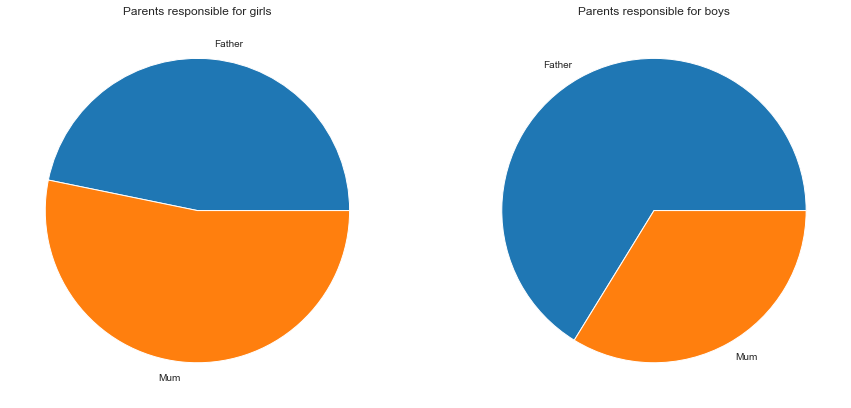

In [17]:
middle_east_countries = ['Egypt', 'Iran', 'Iraq', 'Jordan', 'KuwaIT', 'Lybia', 'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'lebanon']
tmp = df[df.NationalITy.isin(middle_east_countries)]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
tmp1 = tmp[tmp.gender == 'F']
tmp1 = tmp1.groupby(['Relation']).Relation.count().reset_index(name = 'Count')
ax1.set_title('Parents responsible for girls')
ax1.pie(x = tmp1.Count, labels=tmp1.Relation)

tmp1 = tmp[tmp.gender == 'M']
tmp1 = tmp1.groupby(['Relation']).Relation.count().reset_index(name = 'Count')
ax2.set_title('Parents responsible for boys')
ax2.pie(x = tmp1.Count, labels=tmp1.Relation)

As we could see, there is 1/3 of girls and 2/3 of boys. This make sense because all these countries a muslim, and in muslim culture girls are persecuted.

What is fascinating for me is that for more than 1/2 of girls are responsible Mothers, that is in contrast with the fact that the countries are muslim where men are responsible for everything/everyone in the family.

Finally, we can not confirm the hypothesis, but a part of the hypothesis (more boys than girls in muslim countries) is confirmed. Overall, the hypothesis in current form is disproved.

### 7. Sections are divided due to classification of students, A=High-Level, B=Middle-Level, C=Low-Level

<AxesSubplot:xlabel='SectionID', ylabel='Count'>

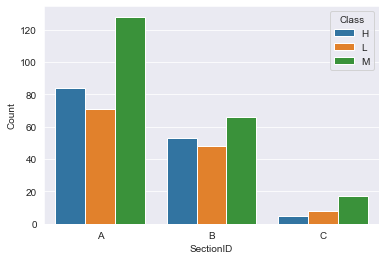

In [18]:
tmp = df.groupby(['SectionID', 'Class']).Class.count().reset_index(name = 'Count')
sns.barplot(data = tmp, y = 'Count', x = 'SectionID', hue = 'Class', order=['A', 'B', 'C'])

From the graph, we could see that there is no relation between SectionID and final marks. The percentual representation of marks in different sections is almost same.  The hypothesis is disproved.

### 8. Girls have better final mark in [English, Spanish, Arabic, History], boys in [IT, Math, Science, Chemistry, Biology, Geology, Quran].

<AxesSubplot:title={'center':'Subjects 2 (IT, ...)'}, xlabel='gender', ylabel='Count'>

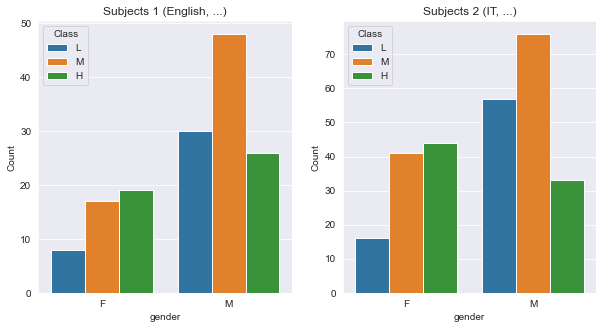

In [27]:
subjects_1 = ['Arabic', 'English', 'History', 'Spanish']
subjects_2 = ['IT', 'Math', 'Science', 'Chemistry', 'Biology', 'Geology', 'Quran']

subjects_1 = df[df['Topic'].isin(subjects_1)]
subjects_2 = df[df['Topic'].isin(subjects_2)]

subjects_1 = subjects_1.groupby(['gender','Class']).Class.count().reset_index(name = 'Count')
subjects_2 = subjects_2.groupby(['gender', 'Class']).Class.count().reset_index(name = 'Count')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.set_title('Subjects 1 (English, ...)')
sns.barplot(data=subjects_1, y='Count', x='gender', hue = 'Class', ax = ax1, hue_order=['L', 'M', 'H'])

ax2.set_title('Subjects 2 (IT, ...)')
sns.barplot(data=subjects_2, y='Count', x='gender', hue = 'Class', ax = ax2, hue_order=['L', 'M', 'H'])

We could see that girls have better marks in all the subjects, and it's not true that boys are better in natural science than girls. We could see that for both girls and boys, there is no difference between the subjects. We see that at least in this case, stereotypes are false.

To sum up, the hypothesis is disproved.

### 9. The more students visit resources, the more they participate on discussion groups. Students from Lover level school participate in discussion less than the other one.

<AxesSubplot:xlabel='VisITedResources', ylabel='Discussion'>

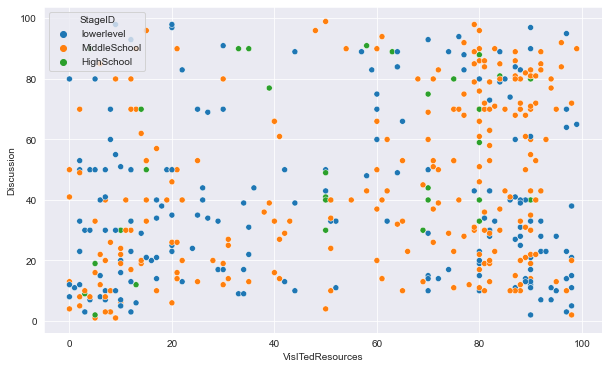

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y = 'Discussion', x = 'VisITedResources', hue = 'StageID')

In [9]:
stages = df.StageID.unique()
for stage in stages:
    tmp = df[df.StageID == stage]
    print(f"StageID = {stage}: {tmp.Discussion.corr(tmp.VisITedResources)}")

StageID = lowerlevel: 0.1002347447300627
StageID = MiddleSchool: 0.34433819872954174
StageID = HighSchool: 0.31636374712001497


We could see that there is some correlation between Discussion and Visited resources, mostly for MiddleSchool and HighSchool, but it is just around 0.3, for the lowerSchool is even lower. There for, we could say that there is some relation between how many times students visit resources and how many times they participate in discussions. From the graph above, we could see that there really is some trend, but it's nothing significant. Also, from graph we could see that there is no really difference in how many times students participate in discussions between stages.

To sum up, the hypothesis is disproved.

### 10. In all countries, the education levels are same lower level=G-01 to G-05, Middle school=G-06 to G-08, High school=G-09 to G-12

<AxesSubplot:xlabel='GradeID', ylabel='Count'>

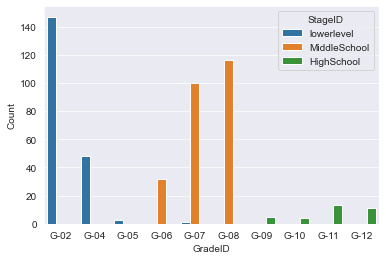

In [21]:
tmp = df
tmp = tmp.groupby(['GradeID', 'StageID']).StageID.count().reset_index(name = 'Count')
tmp.sort_values(by='GradeID')
sns.barplot(data=tmp, x = 'GradeID', y='Count', hue='StageID')

We could see that grade IDs are strictly divided into education levels. Lower level school=G-02 to G-05, Middle school=G-06 to G-08 and High school=G-09 to G-12. There is just one exception, one student of grade G-07 is student of Middle school, it could be specific of the country, but it's more probable that it's a mistake in data.

In [37]:
df[(df.StageID == 'lowerlevel') & (df.GradeID == 'G-07')]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,moved
32,F,KuwaIT,KuwaIT,lowerlevel,G-07,A,IT,F,Father,2,19,10,50,Yes,Good,Above-7,L,False


In [38]:
df[(df.NationalITy == 'KuwaIT') & (df.GradeID == 'G-07')]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,moved
6,M,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L,False
7,M,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M,False
8,F,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M,False
9,F,KuwaIT,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M,False
10,M,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H,False
11,M,KuwaIT,KuwaIT,MiddleSchool,G-07,B,Math,F,Father,19,6,19,12,Yes,Good,Under-7,M,False
16,M,KuwaIT,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,36,30,20,80,No,Bad,Above-7,M,False
17,M,KuwaIT,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,55,13,35,90,No,Bad,Above-7,M,False
18,F,KuwaIT,KuwaIT,MiddleSchool,G-07,A,IT,F,Mum,69,15,36,96,Yes,Good,Under-7,M,False
19,M,KuwaIT,KuwaIT,MiddleSchool,G-07,B,IT,F,Mum,70,50,40,99,Yes,Good,Under-7,H,False


We see that the one exception is student from kuwait, and that rest of the students in kuwait has Grades in same level of education, as the students from other countries. Therefor it might be just mistake in data.

To sum up, the hypothesis is confirmed.

### 11. Parents of students with better marks are more satisfied with school, mothers are more satisfied than fathers.

<AxesSubplot:title={'center':'Mum satisfaction relation'}, xlabel='Class', ylabel='count'>

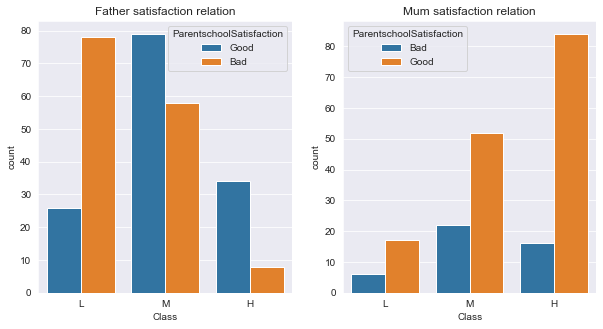

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.set_title('Father satisfaction relation')
tmp = df[df.Relation == 'Father']
sns.countplot(data = tmp, hue='ParentschoolSatisfaction', x = 'Class', ax = ax1, order= ['L', 'M', 'H'])

ax2.set_title('Mum satisfaction relation')
tmp = df[df.Relation == 'Mum']
sns.countplot(data = tmp, hue='ParentschoolSatisfaction', x = 'Class', ax = ax2, order= ['L', 'M', 'H'])

<AxesSubplot:xlabel='Class', ylabel='% satisfied with school'>

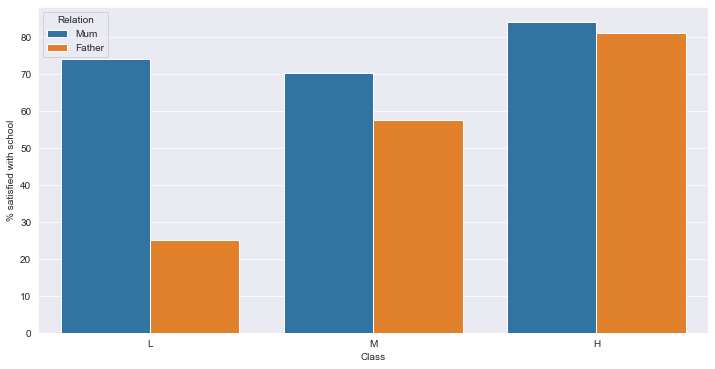

In [40]:
plt.figure(figsize=(12,6))
moms = to_relative_percentage(df[df.Relation == 'Mum'], 'Class', 'ParentschoolSatisfaction', 'Good', relative_column_name='% satisfied with school')
moms.loc[:,'Relation'] = 'Mum'
dads = to_relative_percentage(df[df.Relation == 'Father'], 'Class', 'ParentschoolSatisfaction', 'Good', relative_column_name='% satisfied with school')
dads.loc[:, 'Relation'] = 'Father'
tmp = pd.concat([moms, dads], ignore_index=True)
sns.barplot(data=tmp, y = '% satisfied with school', x = 'Class', hue = 'Relation', order= ['L', 'M', 'H'])

As we could see, for fathers, there is obvious relation between what mark their child has, and how satisfied they are with the school (better mark, more satisfied fathers). On the other hand, mothers don't base their opinion about school on the mark of their children. We see that mothers of children with mark L are usually more satisfied with school than mothers of those with mark M (opposite trend than in the fathers' data), but the difference is so small that we could ignore it. Even though mothers of students with best marks (H) are the most satisfied ones, there is no any obvious trend.

Overall, we could say that fathers usually based their opinion on school on their child's mark, and that mothers are usually satisfied with the school no matter what mark their child has.

## Summary

To sum up, from the 11 hypotheses we had at the beginning, just 3 or 4 were confirm.  The most interesting observation we get, due to my opinion, is how much are parents(especially fathers) affected by the marks that their child get (better marks, more satisfied with school) and also the fact that unsatisfied parents don't answer the surveys even though it's the way how to give feedback to school. On the other hand, the most surprising disproved hypothesis is number **6**, because it is common knowledge, that in muslim countries, women don't have the same laws as men, and they are often persecuted.

Another overall observation is, that there is no difference between boys and girls in natural science/technical subjects and as we saw multiple time, girls have better marks overall. It could be related to the fact that girls have less absence than boys, and are more active during the classes (raise hands more often).